In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Downloads/archive (1)/UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

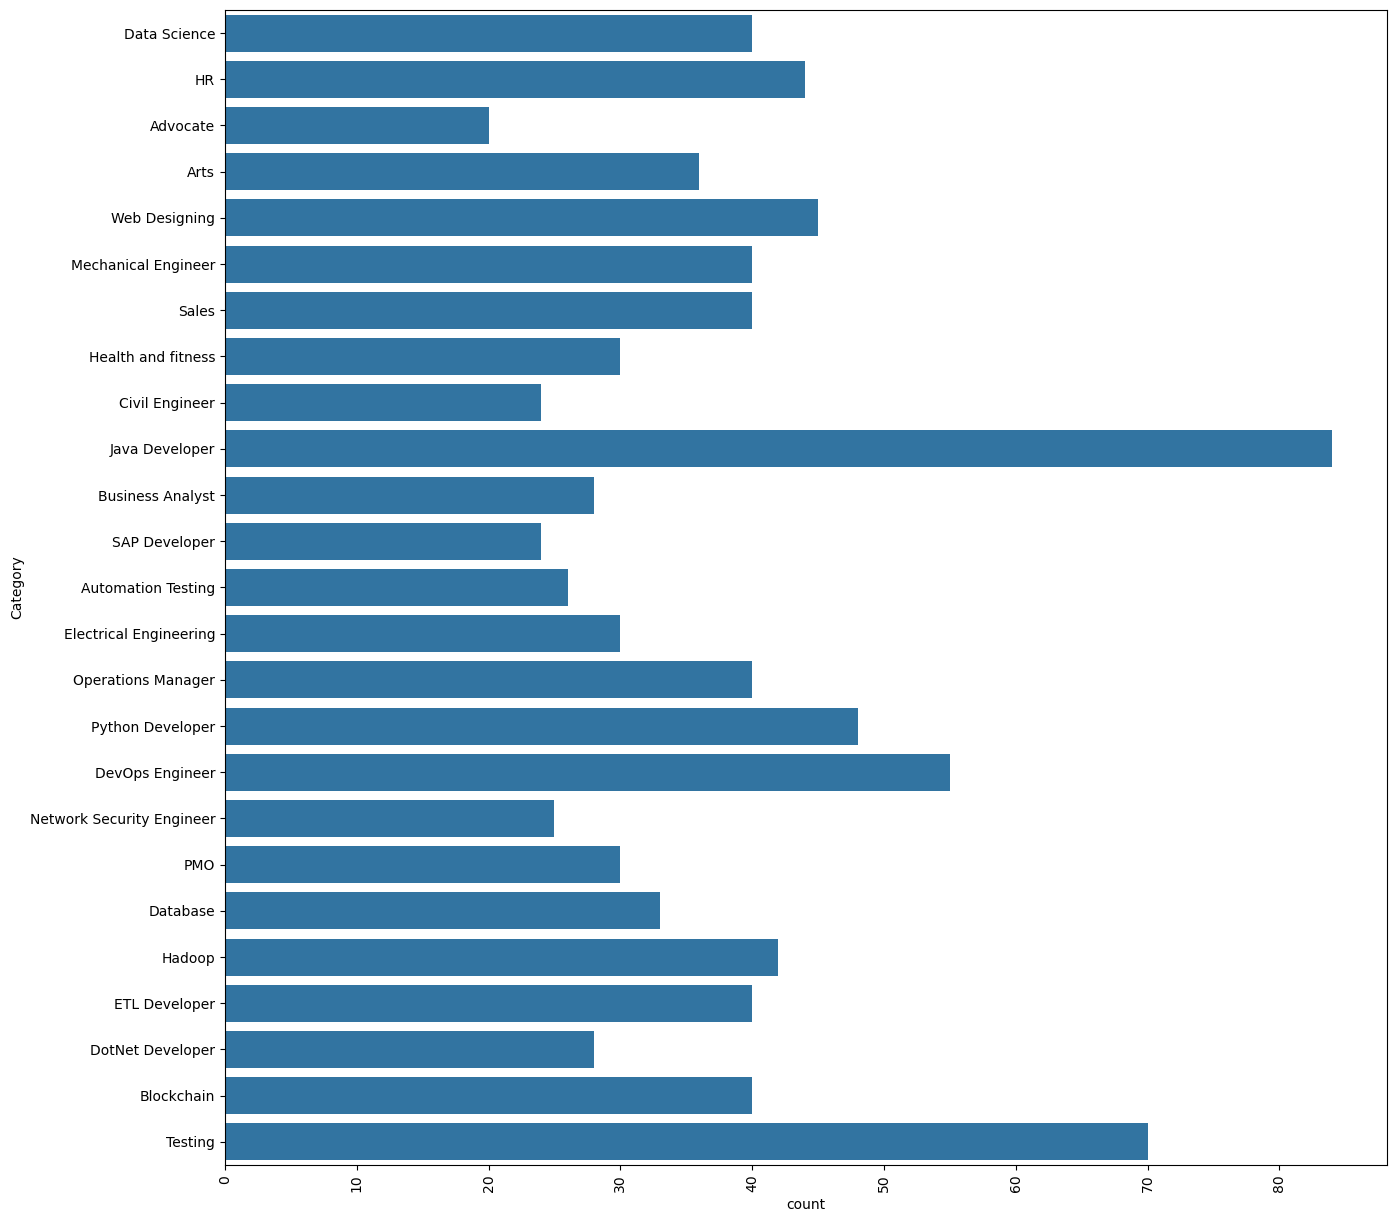

In [6]:
plt.figure(figsize=(15,15))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show

In [7]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [8]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

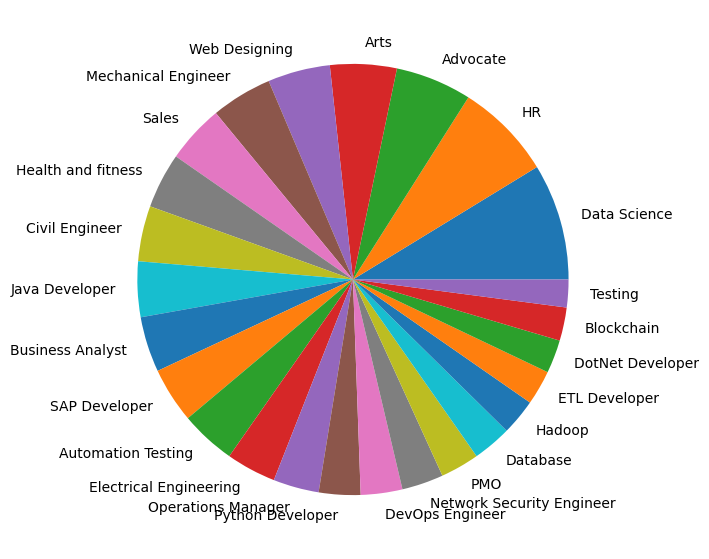

In [9]:
plt.figure(figsize=(15,7))
plt.pie(counts, labels=labels)
plt.show()

In [55]:
df['Category'][0]

df['Resume'][0]

'skills   programming languages  python  pandas  numpy  scipy  scikit learn  matplotlib   sql  java  javascript jquery    machine learning  regression  svm  naã¯ve bayes  knn  random forest  decision trees  boosting techniques  cluster analysis  word embedding  sentiment analysis  natural language processing  dimensionality reduction  topic modelling  lda  nmf   pca   neural nets    database visualizations  mysql  sqlserver  cassandra  hbase  elasticsearch d3 js  dc js  plotly  kibana  matplotlib  ggplot  tableau    others  regular expression  html  css  angular 6  logstash  kafka  python flask  git  docker  computer vision   open cv and understanding of deep learning education details data science assurance associate data science assurance associate   ernst   young llp skill details javascript  exprience   24 months jquery  exprience   24 months python  exprience   24 monthscompany details company   ernst   young llp description   fraud investigations and dispute services assurance te

In [11]:
import re

def CleanResume(txt):
    Cleantxt = re.sub('https\\S+\\s', ' ', txt)
    Cleantxt = re.sub('\\s+', ' ', Cleantxt)
    Cleantxt = re.sub('#\\S+\\s', ' ', Cleantxt)
    Cleantxt = re.sub('@\\S+\\s', ' ', Cleantxt)
    Cleantxt = re.sub('[%s]' % re.escape("""!"&#$@^()':<>?|*{/}][,._+=-~`'"""), ' ', Cleantxt)
    Cleantxt = re.sub('RT|cc', ' ', Cleantxt)
    Cleantxt = Cleantxt.lower()
    
    return Cleantxt

In [12]:
CleanResume("HEy https:\\sdjjkdld.com zainab\n \r @gmail.com #zainab ### hyeihkks")

'hey zainab    hyeihkks'

In [13]:
df['Resume'] = df['Resume'].apply(lambda x: CleanResume(x))

In [14]:
df['Resume'][0]

'skills   programming languages  python  pandas  numpy  scipy  scikit learn  matplotlib   sql  java  javascript jquery    machine learning  regression  svm  naã¯ve bayes  knn  random forest  decision trees  boosting techniques  cluster analysis  word embedding  sentiment analysis  natural language processing  dimensionality reduction  topic modelling  lda  nmf   pca   neural nets    database visualizations  mysql  sqlserver  cassandra  hbase  elasticsearch d3 js  dc js  plotly  kibana  matplotlib  ggplot  tableau    others  regular expression  html  css  angular 6  logstash  kafka  python flask  git  docker  computer vision   open cv and understanding of deep learning education details data science assurance associate data science assurance associate   ernst   young llp skill details javascript  exprience   24 months jquery  exprience   24 months python  exprience   24 monthscompany details company   ernst   young llp description   fraud investigations and dispute services assurance te

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [20]:
df['Category']

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int32

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
RequiredText = tfidf.transform(df['Resume'])

In [23]:
RequiredText

<962x7385 sparse matrix of type '<class 'numpy.float64'>'
	with 164419 stored elements in Compressed Sparse Row format>

In [25]:
from sklearn.model_selection import train_test_split
x = RequiredText
y = df['Category']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape

(769, 7385)

In [30]:
X_test.shape 

(193, 7385)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test, ypred))

In [43]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl', 'wb'))
pickle.dump(clf,open('clf.pkl', 'wb'))

In [58]:
my_resume = """Innovative graduate with a degree in Information Technology seeking an entry-level position to
utilise analytical and quantitative modelling skills with proficiency in data manipulation and
visualisation tools. Eager to show my abilities to support data-driven decision-making and
contribute to continued success.
WORK EXPERIENCE
June 2024 Data Science Intern, BlackCoffer
- Performed data cleaning, preprocessing, and feature engineering tasks.
- Developed and implemented machine learning models for predictive analysis using Python
and scikit-learn.
- Conducted EDA and visualized data using libraries like Matplotlib and Seaborn.
- Collaborated with cross-functional teams to understand business requirements and provide
data-driven insights.
EDUCATION
2021 - 2024 Sophia College (Autonomous) Mumbai
University of Mumbai
Bachelor of Science in Information Technology
CGPA – 9.87
TECHNICAL SKILLS
- Proficient in Programming Languages: SQL, Python, R.
- Data Science Libraries: Numpy, Pandas, Matplotlib, NLP Libraries, Scikit-Learn.
- Familiar with ML frameworks: PyTorch, TensorFlow, Keras.
- Platforms: Pycharm, Vs Code, Google Colab, Jupyter Notebook, Github.
- Data Visualisation Tools: Excel, Google Sheets,Tableau, Power BI, PowerPoint.
- Data Collection, Transformation, Cleaning and Manipulation, Preprocessing.
- Data models, AI, NLP, Machine Learning and Deep Learning.
- Statistical analysis and modelling techniques, ETL Process.
- Strong analytical and communication skills.
- Ability to work collaboratively in a team environment.
PROJECTS → [LINK]
2024 Sarcasm Sniffer – Sarcasm Detection Web Application
Gathered and prepped real-time data from twitter and available dataset from kaggle.
Created a LSTM and Logistic Regression model on Google colab, combining desperate
sources into a projection that outperformed with the accuracy of 0.754 &0.893 respectively.
A project, address the challenge of sarcasm detection within textual data, focusing on the
context-rich environment of tweets, build on pycharm using Flask web framework.
2024 Malaria Detection
Malaria is an infectious disease that causes over 400,000 deaths per year. I have gathered
the data from an open source and trained the model by the neural network(CNN) to identify
the parasite and uninfected blood.
CERTIFICATE
Data Analyst Essential, Cisco
Data Science, Cisco
EXTRA CURRICULAR ACTIVITIES
April, 2024 Data Analytics and Visualization Accenture, Virtual Intern
Read and analyze a client project brief to understand the client and business problem, identify
the requirements that need to be delivered, and identify which tasks you need to focus on as a
data analyst"""

In [63]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = CleanResume(my_resume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)

print(prediction_id)

Predicted Category: Data Science
6
